<a href="https://colab.research.google.com/github/sapkale12345/Default-Loan-Prediction/blob/main/Default_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Preprocessing
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN


#Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
#Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score




In [ ]:
df=pd.read_csv("/content/Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


Basic Data Understanding


In [ ]:
print(df.shape)
df.info()
df.describe()

(65259, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65259 entries, 0 to 65258
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          65259 non-null  object 
 1   Age             65259 non-null  int64  
 2   Income          65259 non-null  int64  
 3   LoanAmount      65259 non-null  int64  
 4   CreditScore     65259 non-null  int64  
 5   MonthsEmployed  65259 non-null  int64  
 6   NumCreditLines  65259 non-null  int64  
 7   InterestRate    65259 non-null  float64
 8   LoanTerm        65259 non-null  int64  
 9   DTIRatio        65259 non-null  float64
 10  Education       65259 non-null  object 
 11  EmploymentType  65259 non-null  object 
 12  MaritalStatus   65259 non-null  object 
 13  HasMortgage     65259 non-null  object 
 14  HasDependents   65259 non-null  object 
 15  LoanPurpose     65259 non-null  object 
 16  HasCoSigner     65259 non-null  object 
 17  Default         652

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000,65259.000000
mean,43.498322,82469.266875,127632.247613,574.433779,59.470648,2.496928,13.514294,36.076311,0.502311,0.116382
std,14.986334,38961.910798,70732.450301,158.482955,34.644342,1.116303,6.637136,16.953544,0.230538,0.320685
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48792.500000,66392.500000,437.000000,29.000000,2.000000,7.790000,24.000000,0.300000,0.000000
50%,43.000000,82352.000000,127764.000000,574.000000,60.000000,2.000000,13.530000,36.000000,0.500000,0.000000
75%,56.000000,116091.500000,188849.500000,711.000000,89.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149997.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
print("Default")
df[df.Default==0].drop(columns="Default").describe()


Default


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000,57664.000000
mean,44.430286,83837.577674,125509.966842,576.337472,60.670800,2.483959,13.196649,36.063471,0.500596
std,14.890291,38505.019885,70614.553535,158.356671,34.543408,1.115941,6.610432,16.954618,0.230538
min,18.000000,15000.000000,5005.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,32.000000,51043.000000,64267.000000,440.000000,31.000000,1.000000,7.460000,24.000000,0.300000
50%,45.000000,84096.500000,124494.000000,576.000000,61.000000,2.000000,13.070000,36.000000,0.500000
75%,57.000000,116955.250000,186204.000000,713.000000,91.000000,3.000000,18.850000,48.000000,0.700000
max,69.000000,149997.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


In [ ]:
print("Non-Default")
df[df.Default==1].drop(columns="Default").describe()

Non-Default


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio
count,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000,7595.000000
mean,36.422515,72080.554049,143745.374457,559.980250,50.358657,2.595392,15.925972,36.173799,0.515336
std,13.774593,40802.307787,69544.277404,158.705771,34.050531,1.114208,6.337226,16.946190,0.230136
min,18.000000,15005.000000,5022.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000
25%,25.000000,34181.500000,87227.500000,420.000000,20.000000,2.000000,10.985000,24.000000,0.320000
50%,34.000000,67812.000000,150642.000000,555.000000,46.000000,3.000000,17.000000,36.000000,0.520000
75%,46.000000,106935.000000,204055.000000,695.000000,78.000000,4.000000,21.480000,48.000000,0.720000
max,69.000000,149995.000000,249992.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000


# Data Cleaning

# Remove Unwanted  Features and Observation

In [ ]:
df.drop(columns=["LoanID"],inplace=True)
df.drop_duplicates(inplace=True)
df.shape

(65259, 17)

# Missing Values

In [ ]:
df.isnull().sum()

,0
Age,0
Income,0
LoanAmount,0
CreditScore,0
MonthsEmployed,0
NumCreditLines,0
InterestRate,0
LoanTerm,0
DTIRatio,0
Education,0


# Outlier Detection(IQR Method)

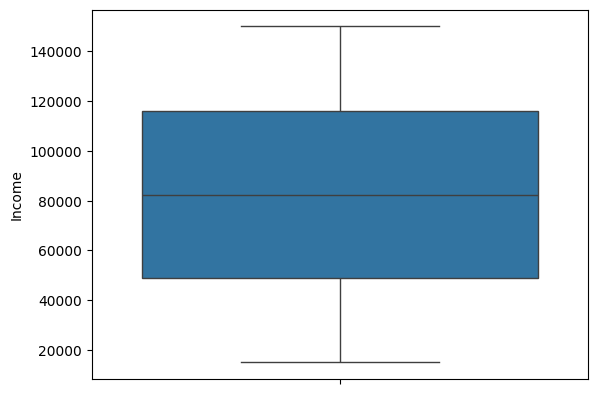

In [ ]:
#Income
sns.boxplot(df.Income)
plt.show()


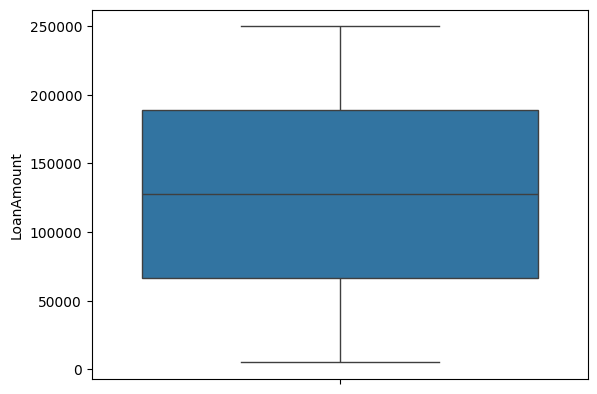

In [ ]:
  #Loane Amount
sns.boxplot(df.LoanAmount)
plt.show()

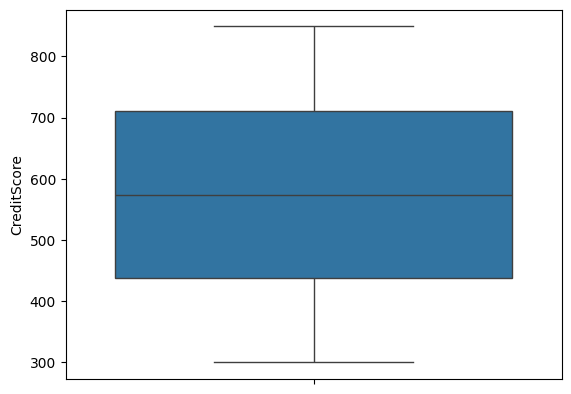

In [ ]:
# CrediScore
sns.boxplot(df.CreditScore)
plt.show()

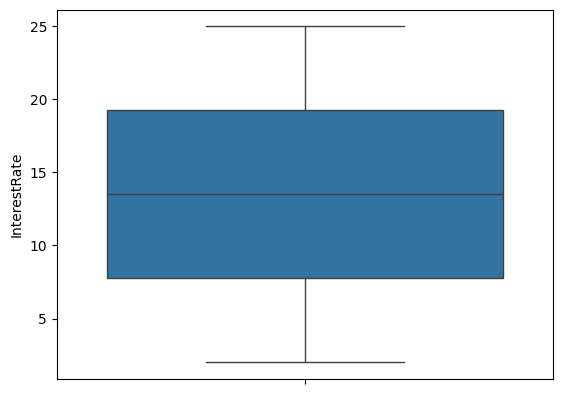

In [ ]:
#InterestRate
sns.boxplot(df.InterestRate)
plt.show()

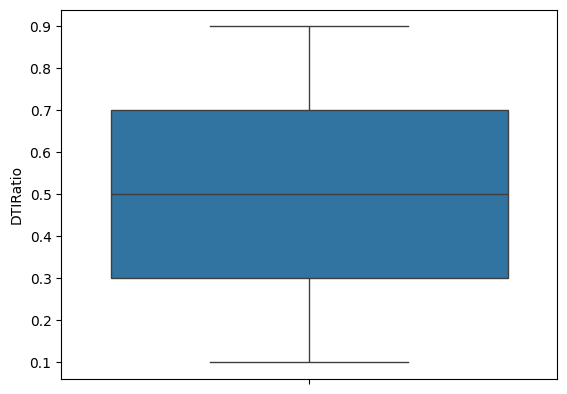

In [ ]:
#DTI Ratio
sns.boxplot(df.DTIRatio)
plt.show()

# **Exploratory Data Analysis**

Default
Non_Default    88.361759
Default        11.638241
Name: count, dtype: float64


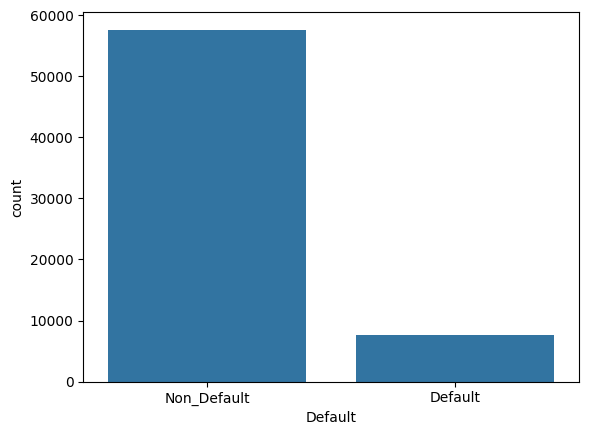

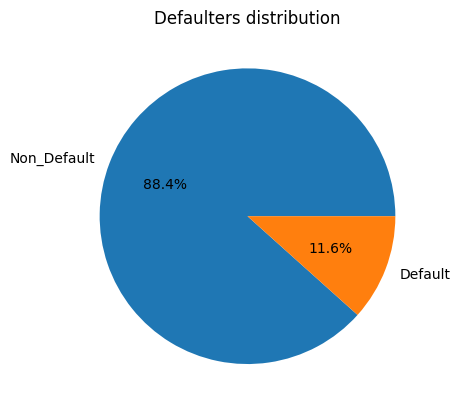

In [ ]:
#Default Distribution
print((df.Default.value_counts()/df.Default.shape*100).rename({0:"Non_Default",1:"Default"}))
sns.countplot(data=df,x="Default")
plt.xticks([0,1],["Non_Default","Default"])
plt.show()
plt.pie(df.Default.value_counts(),labels=["Non_Default","Default"],autopct="%1.1f%%")
plt.title("Defaulters distribution")
plt.show()

# Credit Score-Wise Default Analysis

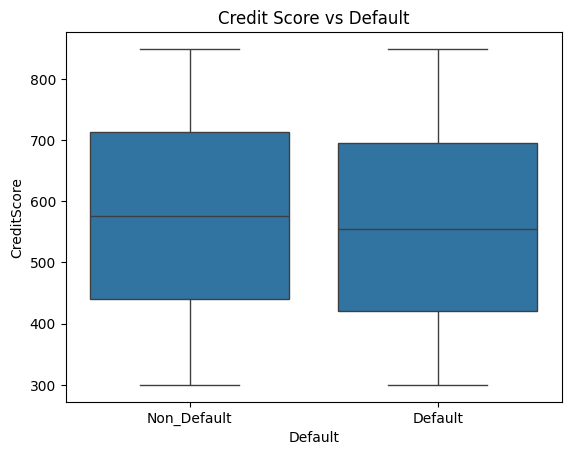

Credit_Score
poor(300-450)         13.122729
Fair(450-600)         11.582665
Good(600-739)         11.222081
very Good(739-799)    10.606920
Excellent(799-850)     9.725017
Name: Default Rate, dtype: float64


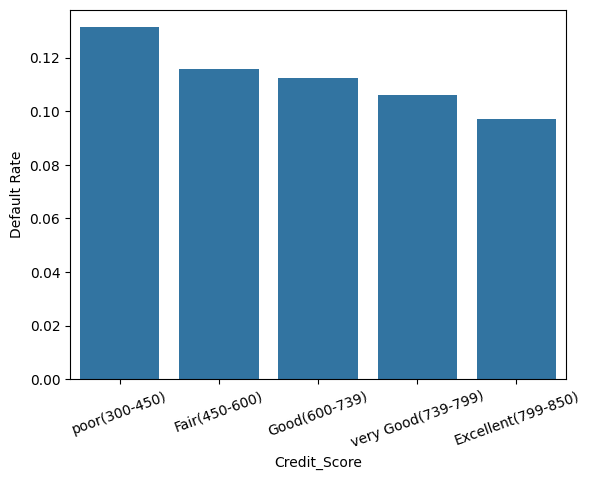

In [ ]:
#Credit Score vs Default
df1=df.loc[:,["CreditScore","Default"]]
sns.boxplot(x='Default', y='CreditScore', data=df)
plt.title("Credit Score vs Default")
plt.xticks([0,1],["Non_Default","Default"])
plt.show()
df1["Credit_Score"]=pd.cut(df1["CreditScore"],bins=[300,450,600,739,799,850],labels=["poor(300-450)","Fair(450-600)","Good(600-739)","very Good(739-799)","Excellent(799-850)"],include_lowest=True)
Default_Rate=(df1.groupby(by="Credit_Score",observed=False).Default.mean()*100).rename("Default Rate")
print(Default_Rate)
sns.barplot(Default_Rate/100)
plt.xticks(rotation=20)
plt.show()






There is strong  inverse relationship between Credit Score and Default Rate

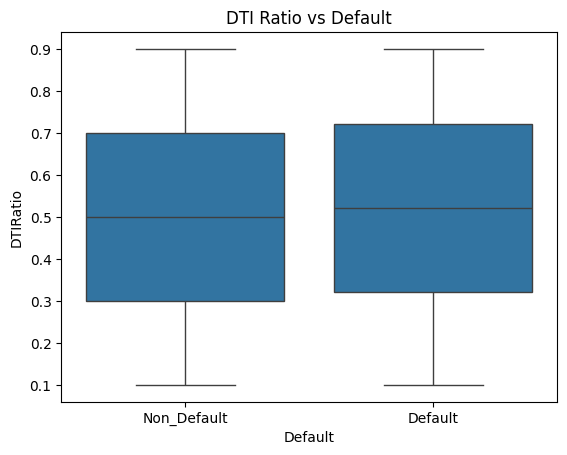

In [ ]:
#DTI Ratio vs Default
sns.boxplot(x='Default', y='DTIRatio', data=df)
plt.title("DTI Ratio vs Default")
plt.xticks([0,1],["Non_Default","Default"])
plt.show()


 The median Debt-to-Income Ratio for defaulters was slightly higher than for non-defaulters, suggesting an increased risk of default with higher DTI.

Age-Wise Default Analysis

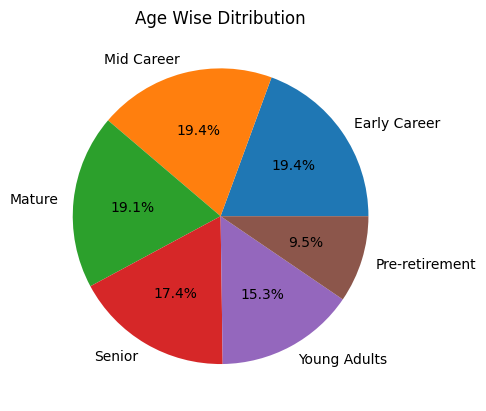

                Default Rate Out of Total Defaulter  Default Rate Within Group
Age_Group                                                                     
Young Adults                               0.271231                   0.206890
Early Career                               0.274128                   0.164442
Mid Career                                 0.190915                   0.114688
Mature                                     0.139961                   0.085361
Pre-retirement                             0.053720                   0.065711
Senior                                     0.070046                   0.046930


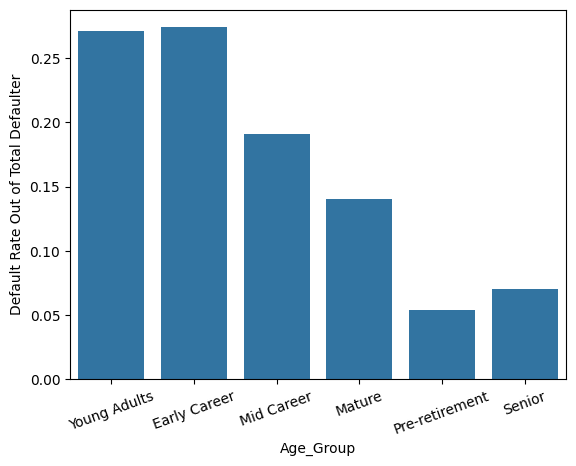

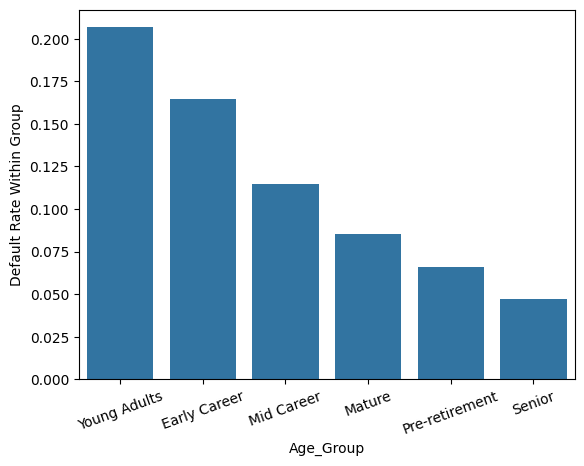

In [ ]:
df3=df.loc[:,["Age","Default"]]
df3["Age_Group"]=pd.cut(df3["Age"],bins=[18,25,35,45,55,60,100],labels=["Young Adults","Early Career","Mid Career","Mature","Pre-retirement","Senior"],include_lowest=True)
plt.pie(df3.Age_Group.value_counts(),labels=df3.Age_Group.value_counts().index,autopct="%1.1f%%")
plt.title("Age Wise Ditribution")
plt.show()
Default_Rate1 =((df3.groupby(by="Age_Group",observed=False).Default.sum()/(df3[df3.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df3.groupby(by="Age_Group",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.show()






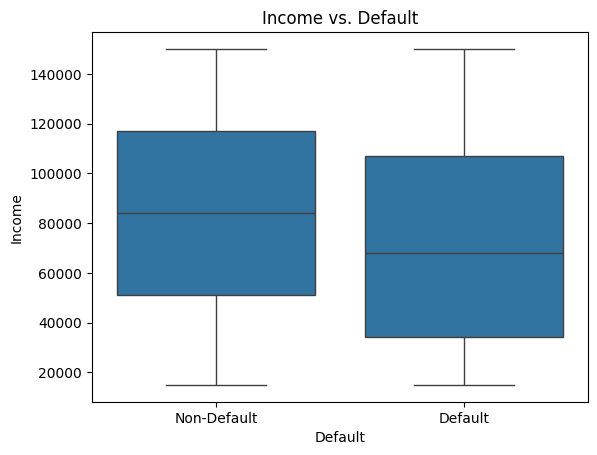

In [ ]:
#Income vs Default
sns.boxplot(x='Default', y='Income', data=df)
plt.title('Income vs. Default')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

Non-defaulters has a higher median income than defaulters.

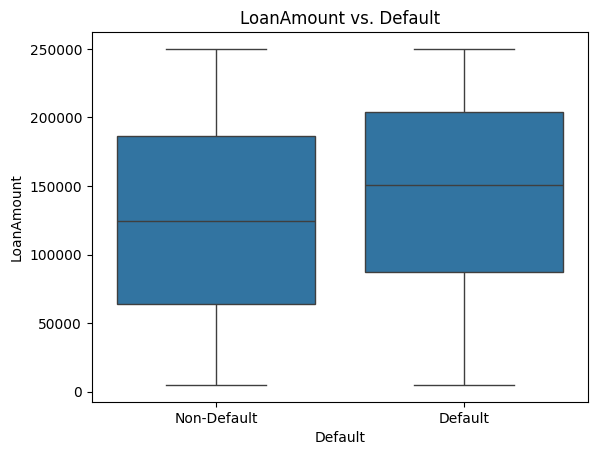

In [ ]:
#LoanAmount vs Default
sns.boxplot(x='Default', y='LoanAmount', data=df)
plt.title('LoanAmount vs. Default')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

The median LoanAmount for defaulters seems to be higher than for non-defaulters. This could indicate that individuals taking larger loans might have a marginally higher risk of defaulting.

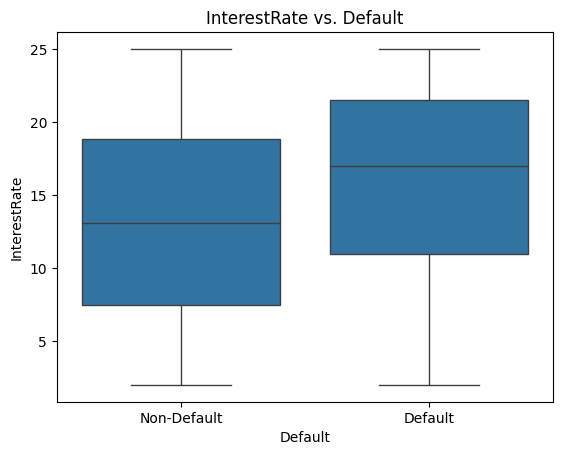

In [ ]:
#InterestRate vs Default
sns.boxplot(x='Default', y='InterestRate', data=df)
plt.title('InterestRate vs. Default')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

 There is strong positive relationship between InterestRate and Default. Defaulters tend to have significantly higher median .This is a strong indicator that higher interest rates are associated with a greater likelihood of default.

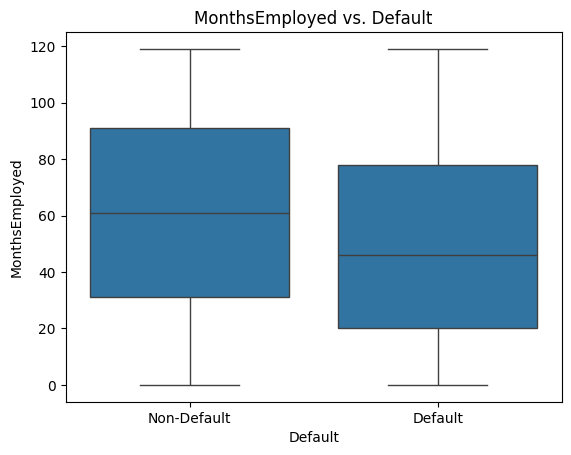

In [ ]:
#MonthsEmployed vs Default
sns.boxplot(x='Default', y='MonthsEmployed', data=df)
plt.title('MonthsEmployed vs. Default')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

 Non-defaulters showed a higher median and broader distribution of MonthsEmployed compared to defaulters, suggesting that longer employment histories are associated with a lower likelihood of default.

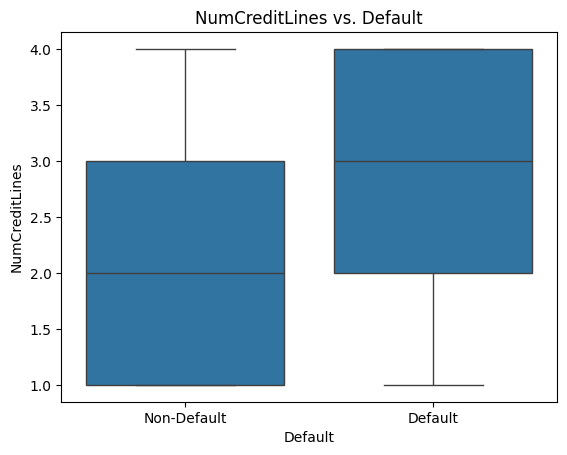

In [ ]:
# NumCreditLines vs Default
sns.boxplot(x='Default', y='NumCreditLines', data=df)
plt.title('NumCreditLines vs. Default')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

There is strong Positive correlation With Defaulters

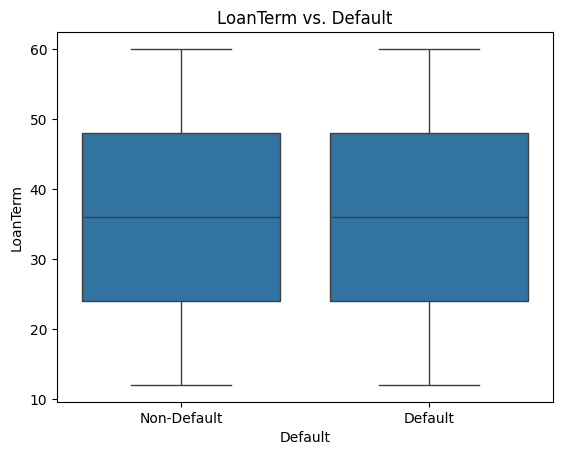

In [ ]:
#LoanTerm vs Default
sns.boxplot(x='Default', y='LoanTerm', data=df)
plt.title('LoanTerm vs. Default')
plt.xticks([0, 1], ['Non-Default', 'Default'])
plt.show()

The distributions of LoanTerm for defaulters and non-defaulters appear quite similar. this feature does not seem to be a strong predictor of default alone

<Axes: xlabel='Income', ylabel='LoanAmount'>

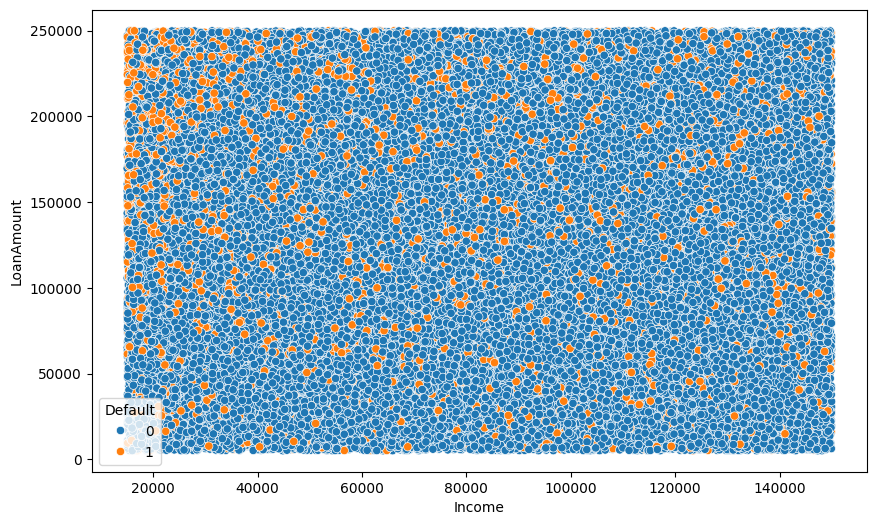

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="Income",y="LoanAmount",hue="Default")

Education
Bachelor's     16501
PhD            16438
High School    16213
Master's       16107
Name: count, dtype: int64


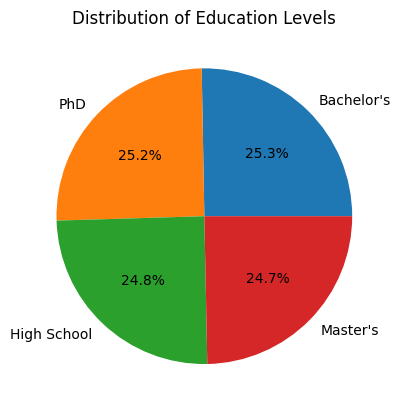

             Default Rate Out of Total Defaulter  Default Rate Within Group
Education                                                                  
Bachelor's                              0.261619                   0.120417
High School                             0.275971                   0.129279
Master's                                0.231863                   0.109331
PhD                                     0.230546                   0.106521


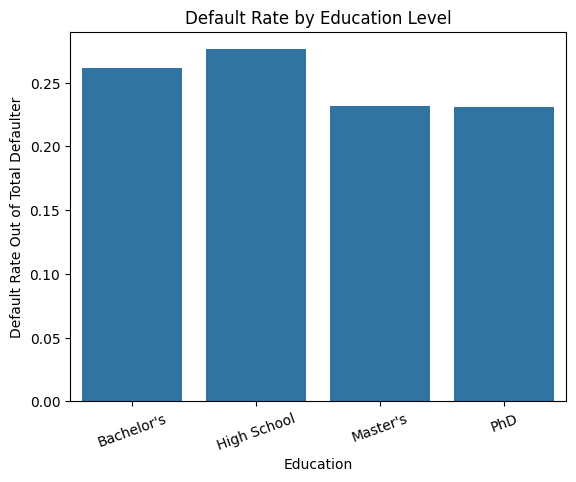

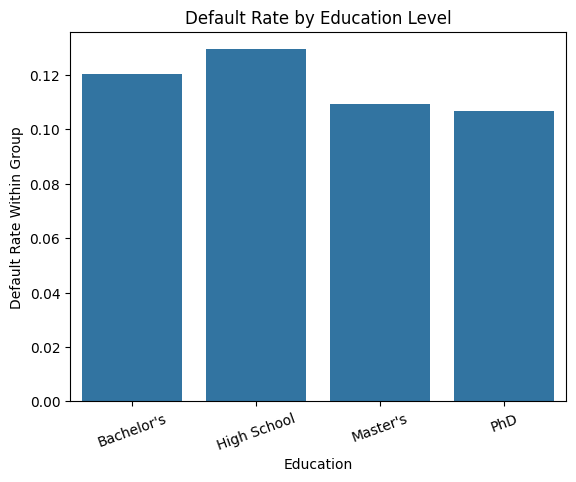

EmploymentType
Self-employed    16536
Part-time        16358
Full-time        16229
Unemployed       16136
Name: count, dtype: int64


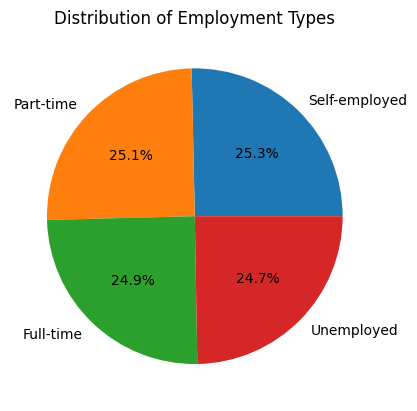

                Default Rate Out of Total Defaulter  Default Rate Within Group
EmploymentType                                                                
Full-time                                  0.204345                   0.095631
Part-time                                  0.260303                   0.120858
Self-employed                              0.248848                   0.114296
Unemployed                                 0.286504                   0.134854


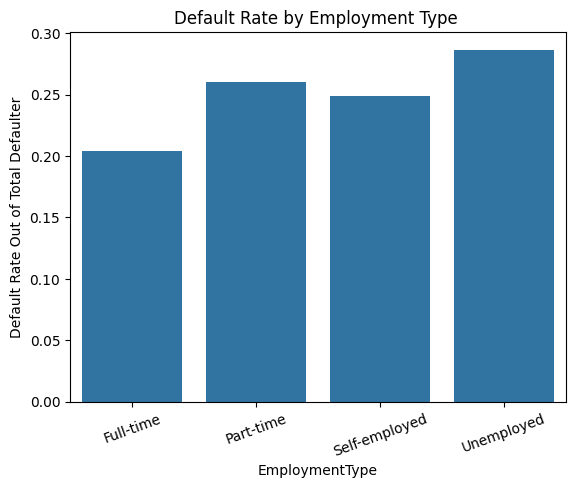

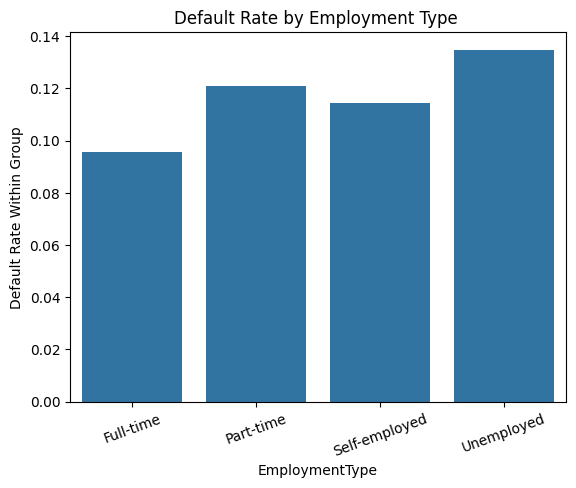

MaritalStatus
Divorced    21814
Single      21738
Married     21707
Name: count, dtype: int64


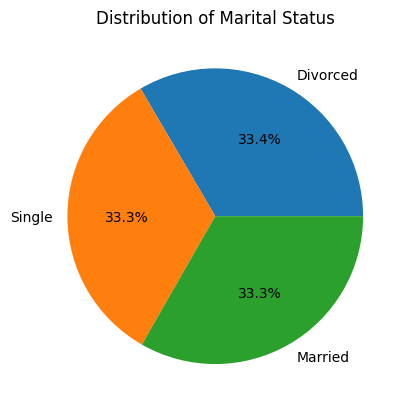

               Default Rate Out of Total Defaulter  Default Rate Within Group
MaritalStatus                                                                
Divorced                                  0.356155                   0.124003
Married                                   0.298223                   0.104344
Single                                    0.345622                   0.120756


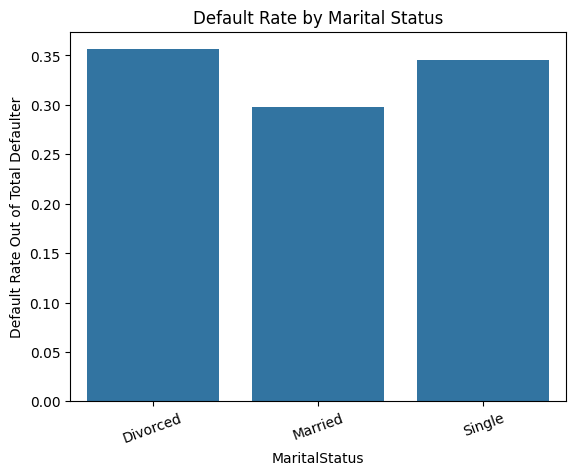

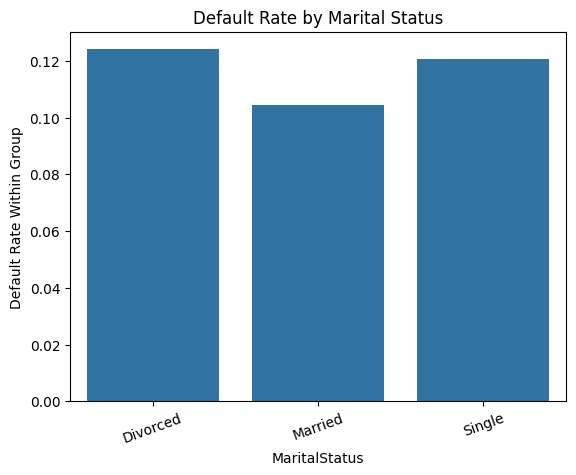

HasMortgage
Yes    32648
No     32611
Name: count, dtype: int64


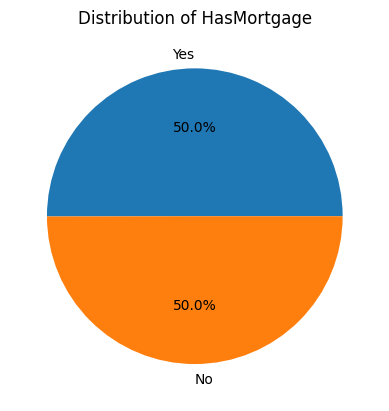

             Default Rate Out of Total Defaulter  Default Rate Within Group
HasMortgage                                                                
No                                      0.530349                   0.123517
Yes                                     0.469651                   0.109256


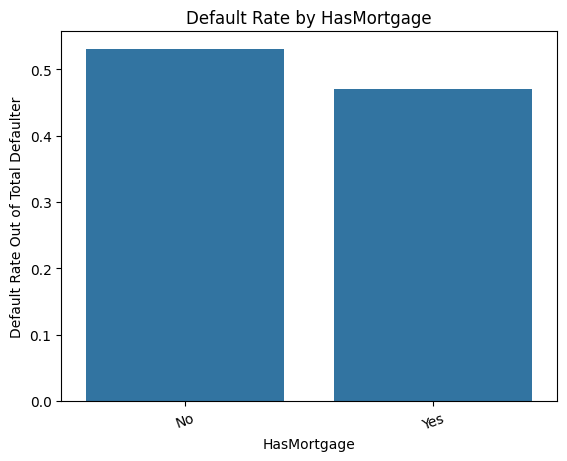

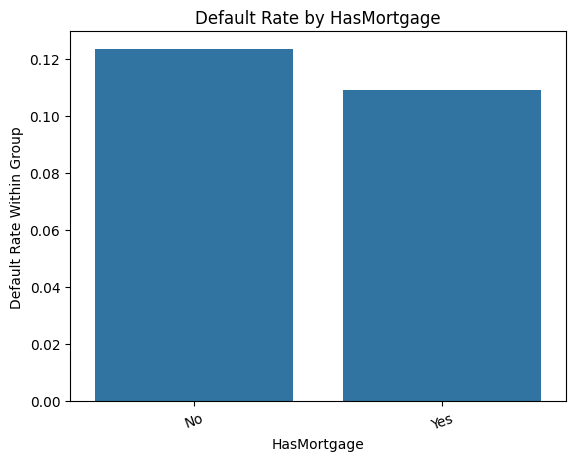

HasDependents
No     32778
Yes    32481
Name: count, dtype: int64


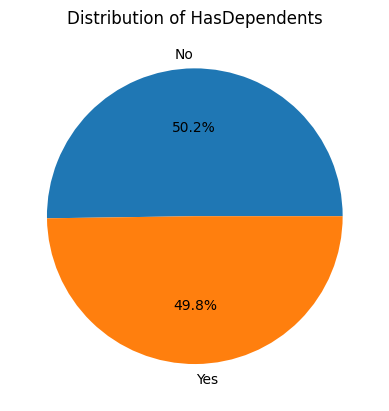

               Default Rate Out of Total Defaulter  Default Rate Within Group
HasDependents                                                                
No                                        0.551679                   0.127830
Yes                                       0.448321                   0.104831


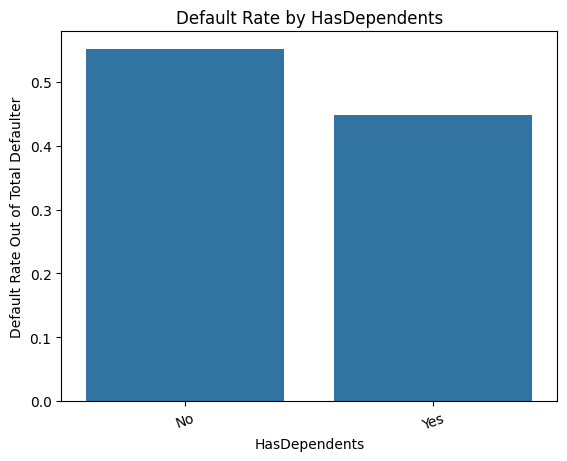

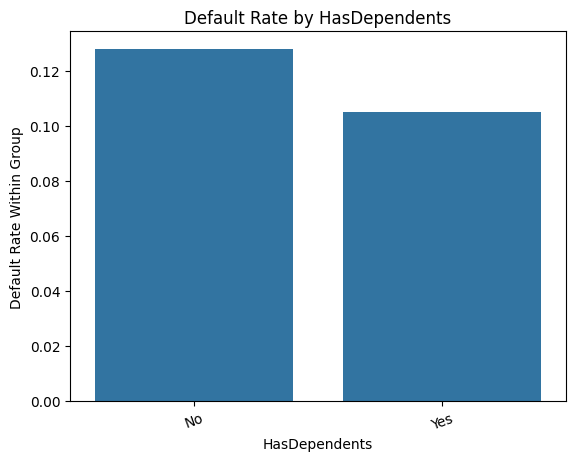

LoanPurpose
Business     13311
Other        13046
Auto         13042
Education    12954
Home         12906
Name: count, dtype: int64


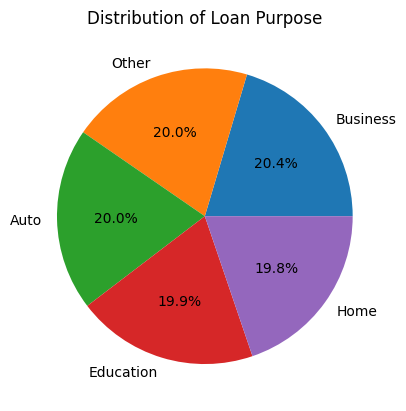

             Default Rate Out of Total Defaulter  Default Rate Within Group
LoanPurpose                                                                
Auto                                    0.204213                   0.118923
Business                                0.216590                   0.123582
Education                               0.198288                   0.116258
Home                                    0.175510                   0.103285
Other                                   0.205398                   0.119577


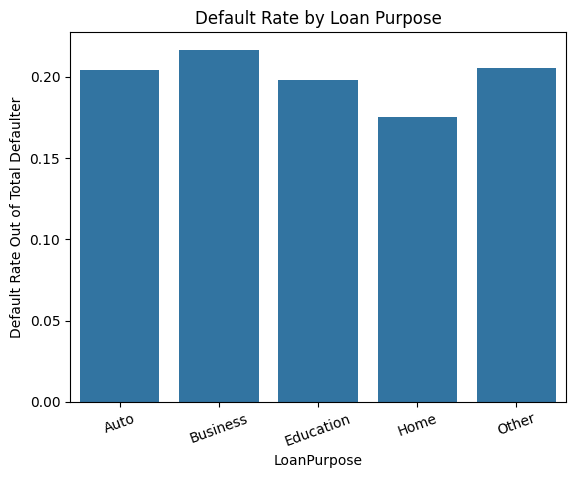

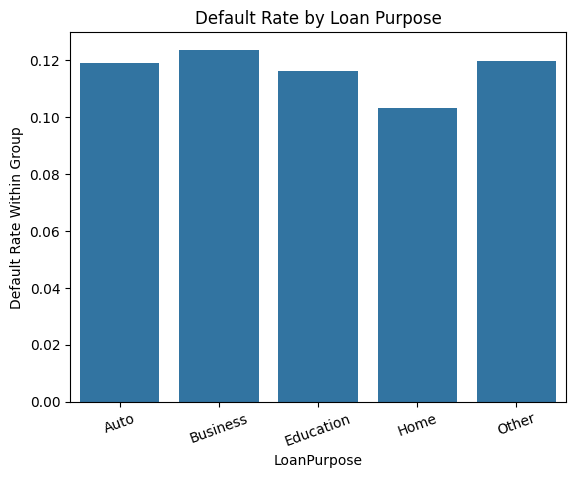

HasCoSigner
Yes    32760
No     32499
Name: count, dtype: int64


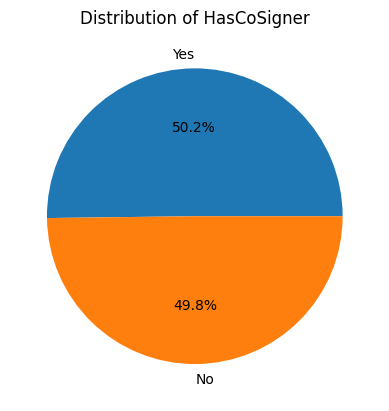

             Default Rate Out of Total Defaulter  Default Rate Within Group
HasCoSigner                                                                
No                                      0.550625                   0.128681
Yes                                     0.449375                   0.104182


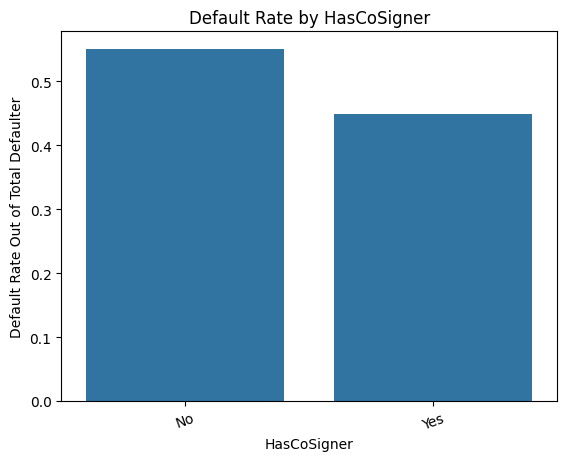

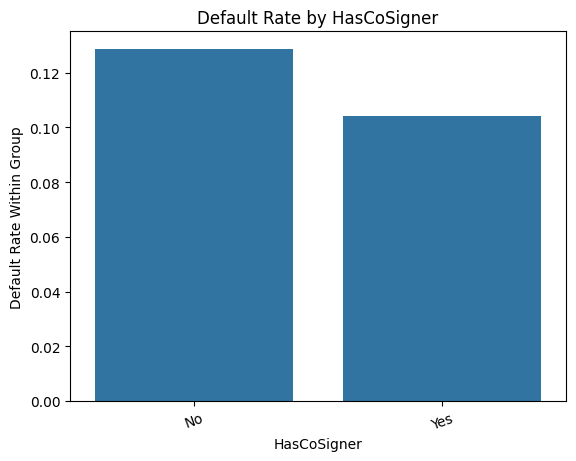

In [ ]:
# Analyze Education
print(df['Education'].value_counts())
plt.pie(df.Education.value_counts(),labels=df.Education.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of Education Levels')
plt.xticks(rotation=45)
plt.show()
Default_Rate1 =((df.groupby(by="Education",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="Education",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by Education Level')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by Education Level')
plt.show()


# Analyze EmploymentType
print(df['EmploymentType'].value_counts())
plt.pie(df.EmploymentType.value_counts(),labels=df.EmploymentType.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of Employment Types')
plt.xticks(rotation=45)
plt.show()
Default_Rate1 =((df.groupby(by="EmploymentType",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="EmploymentType",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by Employment Type ')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by Employment Type ')
plt.show()



# Analyze MaritalStatus
print(df['MaritalStatus'].value_counts())
plt.pie(df.MaritalStatus.value_counts(),labels=df.MaritalStatus.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of Marital Status')
plt.show()


Default_Rate1 =((df.groupby(by="MaritalStatus",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="MaritalStatus",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by Marital Status')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by Marital Status')
plt.show()

# Analyze HasMortgage
print(df['HasMortgage'].value_counts())
plt.pie(df.HasMortgage.value_counts(),labels=df.HasMortgage.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of HasMortgage')
plt.show()

Default_Rate1 =((df.groupby(by="HasMortgage",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="HasMortgage",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by HasMortgage')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by HasMortgage')
plt.show()



# Analyze HasDependents
print(df['HasDependents'].value_counts())
plt.pie(df.HasDependents.value_counts(),labels=df.HasDependents.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of HasDependents')
plt.show()

Default_Rate1 =((df.groupby(by="HasDependents",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="HasDependents",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by HasDependents')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by HasDependents')
plt.show()


# Analyze LoanPurpose

print(df['LoanPurpose'].value_counts())
plt.pie(df.LoanPurpose.value_counts(),labels=df.LoanPurpose.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of Loan Purpose')
plt.xticks(rotation=45)
plt.show()

Default_Rate1 =((df.groupby(by="LoanPurpose",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="LoanPurpose",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by Loan Purpose')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by Loan Purpose')
plt.show()


print(df['HasCoSigner'].value_counts())
plt.pie(df.HasCoSigner.value_counts(),labels=df.HasCoSigner.value_counts().index,autopct="%1.1f%%")
plt.title('Distribution of HasCoSigner')
plt.show()

Default_Rate1 =((df.groupby(by="HasCoSigner",observed=False).Default.sum()/(df[df.Default==1].shape[0]))).rename("Default Rate Out of Total Defaulter")
Default_Rate2 =(df.groupby(by="HasCoSigner",observed=False).Default.mean()).rename("Default Rate Within Group")
print(pd.DataFrame([Default_Rate1,Default_Rate2]).T)
sns.barplot(Default_Rate1)
plt.xticks(rotation=20)
plt.title('Default Rate by HasCoSigner')
plt.show()
sns.barplot(Default_Rate2)
plt.xticks(rotation=20)
plt.title('Default Rate by HasCoSigner')
plt.show()



1. Education: Borrowers with 'High School' education have a higher default rate compared to those with 'Master's' or 'PhD' degrees.
2. EmploymentType: 'Unemployed' and 'Part-time' individuals show higher default rates, while 'Full-time' employees have lower default rates.
3. MaritalStatus: 'Single' and 'Divorced' individuals appear to have slightly higher default rates than 'Married' individuals.
4. HasMortgage: Borrowers without a mortgage ('No') tend to have a higher default rate than those with a mortgage ('Yes').
5. HasDependents: Individuals without dependents ('No') seem to have a slightly higher default rate compared to those with dependents ('Yes').
6. LoanPurpose: Loans for'Home Improvement' show relatively lower default rates, whereas 'Business'loans might have higher default tendencies.
7. HasCoSigner:borrower's with No co-signers("No")has higher default rate

# Finding Correlation

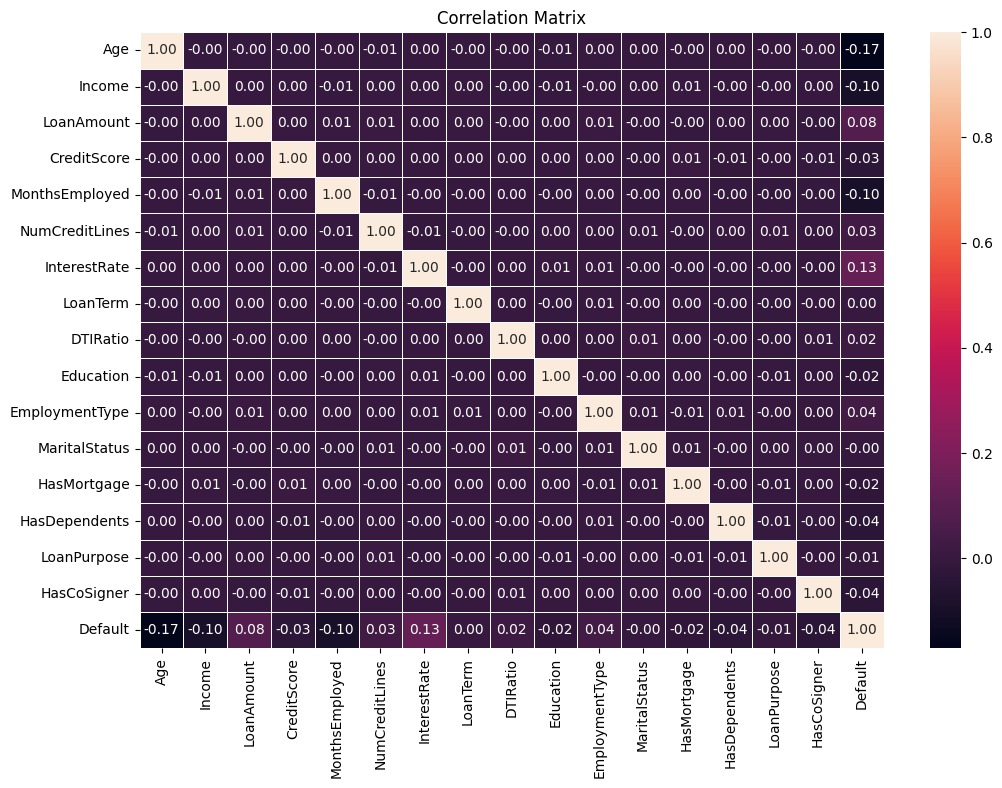

In [ ]:
from sklearn.preprocessing import LabelEncoder
data=df.copy()
num_features = [
    'Age','Income','LoanAmount','InterestRate','LoanTerm',
    'DTIRatio','CreditScore','MonthsEmployed','NumCreditLines'
]

cat_features = ['Education','MaritalStatus','EmploymentType','LoanPurpose','HasDependents','HasMortgage','HasCoSigner']
encoder=LabelEncoder()
for  col in cat_features:
    data[col]=encoder.fit_transform(data[col])
Correlation_Matrix=data.corr()
plt.figure(figsize=(12,8))
sns.heatmap(Correlation_Matrix,annot=True,fmt=".2f",linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()




Strongest Positive Correlation with Default: InterestRate has the highest positive correlation with 'Default' (0.13), indicating that higher interest rates are associated with an increased likelihood of default.


Strongest Negative Correlations with Default: Income (-0.10) and Age (-0.17) show the strongest negative correlations with 'Default', suggesting that higher income and older age are linked to a lower probability of defaulting.

most features show very low correlation with each other, often close to zero, suggesting they are largely independent.

# FEATURE & TARGET SPLIT

In [ ]:

X = df.drop(columns='Default')
y = df['Default']


# Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# DATA PREPROCESSING PIPELINE

In [ ]:
#Column Transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore',drop="first"), cat_features)
    ]
)

# Model Development

Logistic Regression With SMOTTEEN

In [ ]:
lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', LogisticRegression(
        class_weight='balanced',
        max_iter=1000
    ))
])
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:,1]
threshold = 0.45
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))




[[6545 4988]
 [ 346 1173]]
              precision    recall  f1-score   support

           0       0.95      0.57      0.71     11533
           1       0.19      0.77      0.31      1519

    accuracy                           0.59     13052
   macro avg       0.57      0.67      0.51     13052
weighted avg       0.86      0.59      0.66     13052

ROC-AUC: 0.7456199621123276


Random Forest with SMOTTEEN¶

In [ ]:
rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        max_depth=5,
        class_weight="balanced"
    ))
])
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:,1]
threshold = 0.49
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

[[8024 3509]
 [ 540  979]]
              precision    recall  f1-score   support

           0       0.94      0.70      0.80     11533
           1       0.22      0.64      0.33      1519

    accuracy                           0.69     13052
   macro avg       0.58      0.67      0.56     13052
weighted avg       0.85      0.69      0.74     13052

ROC-AUC: 0.731720984755255


Gradient Boosting With SMOTTEEN

In [ ]:

gb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('smoteenn', SMOTEENN(random_state=42)),
    ('model', GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.05,
        random_state=42
    ))
])
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)
y_prob = gb.predict_proba(X_test)[:,1]
threshold = 0.49
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))



[[8362 3171]
 [ 575  944]]
              precision    recall  f1-score   support

           0       0.94      0.73      0.82     11533
           1       0.23      0.62      0.34      1519

    accuracy                           0.71     13052
   macro avg       0.58      0.67      0.58     13052
weighted avg       0.85      0.71      0.76     13052

ROC-AUC: 0.7418527719095794


Balanced Random Forest With SMOTTEEN

In [ ]:
brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', BalancedRandomForestClassifier(
        n_estimators=300,
        random_state=42,
        max_depth=4
    ))
])
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
y_prob = brf.predict_proba(X_test)[:,1]
threshold = 0.48
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))



[[7061 4472]
 [ 396 1123]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     11533
           1       0.20      0.74      0.32      1519

    accuracy                           0.63     13052
   macro avg       0.57      0.68      0.53     13052
weighted avg       0.86      0.63      0.69     13052

ROC-AUC: 0.7441349142258694


In loan default prediction, missing a defaulter leads to financial loss.
Hence, recall for default cases was prioritized over accuracy.
Threshold tuning was applied to improve recall while maintaining stable ROC-AUC.
Balanced Random Forest was selected due to its robustness on imbalanced data


## FINAL MODEL (Balanced Random Forest)

In [ ]:
brf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', BalancedRandomForestClassifier(
        n_estimators=300,
        random_state=42,
        max_depth=4
    ))
])
brf.fit(X_train, y_train)

y_pred = brf.predict(X_test)
y_prob = brf.predict_proba(X_test)[:,1]
threshold = 0.48
y_pred_thresh = (y_prob >= threshold).astype(int)
print(confusion_matrix(y_test,y_pred_thresh))
print(classification_report(y_test, y_pred_thresh))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))



[[7061 4472]
 [ 396 1123]]
              precision    recall  f1-score   support

           0       0.95      0.61      0.74     11533
           1       0.20      0.74      0.32      1519

    accuracy                           0.63     13052
   macro avg       0.57      0.68      0.53     13052
weighted avg       0.86      0.63      0.69     13052

ROC-AUC: 0.7441349142258694


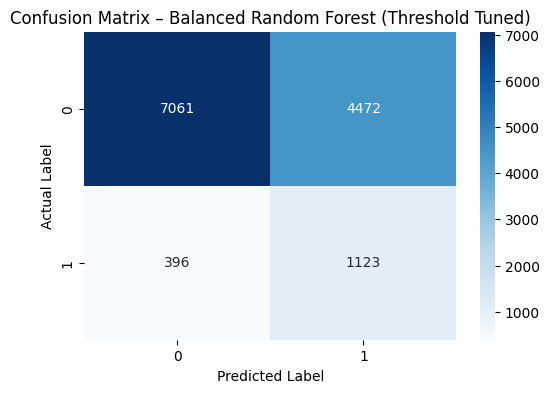

In [ ]:
cm = confusion_matrix(y_test, y_pred_thresh)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix – Balanced Random Forest (Threshold Tuned)")
plt.show()
